# Alura Challenge - Data Science - Week 2

Guilherme Lupinari Volpato
E-mail: lv.gui97@gmail.com
Github: https://github.com/LupiVolpi

You have been hired as a data scientist by the *telecom operator Alura Voz*. In the initial meeting with the people responsible for the company's *sales area*, the importance of reducing the Customer Evasion Rate, known as *Churn Rate*, was explained. Basically, the Churn Rate indicates how much the company lost revenue or customers in a period of time.


### *Week 2 Challenges:*
- Analyse the target variable *churn*
- Visualize the distribution of the *churn* variable
- Create relevant visualizations regarding the *churn* variable
- Analyse the correlation of the variables
- Test different types of graphs.


### *Data index:*
- *customerID:* each customer's unique identification number.
- *Churn:* whether the client has left the company or not.
- *gender:* Male or Female (according to the database).
- *SeniorCitizen:* whether a client is 65 years of age or older.
- *Partner:* whether the client is partnered or not.
- *Dependents:* whether the client has got dependents or not.
- *tenure:* duration (in months) of the client's contract with the company.
- *PhoneService:* whether the client has hired the companie's phone service.
- *MultipleLines:* whether the client has hired more than one phone line.
- *InternetService:* whether the client has hired a provider of internet.
- *OnlineSecurity:* whether the client has hired an additional online security membership.
- *OnlineBackup:* whether the client has hired an additional online backup membership.
- *DeviceProtection:* whether the client has hired an additional device protection membership.
- *TechSupport:* whether the client has hired an additional technical support membership (with decreased waiting time for services).
- *StreamingTV:* whether the client has hired the cable TV service.
- *StreamingMovies:* whether the client has hired a movie streaming membership.
- *Contract:* the type of the client's contract.
- *PaperlessBilling:* whether the client prefers to receive his billings online.
- *PaymentMethod:* the client's prefered method of payment.
- *Charges.Monthly:* the monthly sum of the client's hired services and membreships.
- *Charges.Total:* the total sum of the client's hired services and memberships.

---
# 1. Importing libraries and Setting preferences

In [112]:
import pandas as pd

pd.set_option("display.max_rows", 100) # Pandas will display 100 DataFrame rows at most.
pd.set_option("display.max_columns", None) # Pandas won't collapse DataFrame columns visualization.
pd.set_option("display.max_colwidth", None) # Pandas will display all the information in each column, regardless of how large the values are.

import matplotlib.pyplot as plt
import numpy as np

---
# 2. Importing the treated data from week 1

In [113]:
data_treated = pd.read_json(path_or_buf = "https://raw.githubusercontent.com/LupiVolpi/alura_challenge_data_science/main/datasets/data_treated.json")

data_treated.head(5)

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,services_hired,contract,paperless_billing,payment_method,charges_daily,charges_monthly,charges_total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,5,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,4,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,3,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,6,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,4,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


---
# 3. Basic information about the database.

## 3a. Gender

Text(0.5, 1.0, 'Customers by gender')

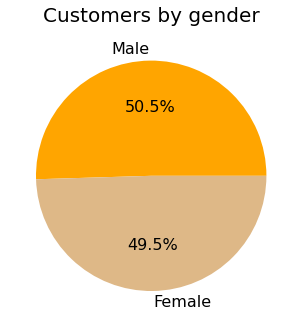

In [114]:
fig = plt.figure(figsize = (5, 4)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

labels = data_treated["gender"].value_counts().index # Decided to create a variable to store the labels directly from the sub_set. That way, if the order ever changes (due to a change in percentages) the labels will switch accordingly.

axis.pie(data_treated["gender"].value_counts(normalize = True).round(decimals = 4) * 100, labels = labels, colors = ["orange", "burlywood"], autopct = "%.1f%%", textprops={'fontsize': 16}) # Plotting a pie chart ("autopct" is the parameter to have the values of each slice appear on the graph; "textprops" allows us to change the font size of the labels of each slice).
axis.set_title("Customers by gender", fontsize = 20, pad = 10) # Setting the text and font size of the title.

### <font color = "Green"> The customer base is almost equally divided between male and female.

## 3b. Age

Text(0.5, 1.0, '65 years old or more?')

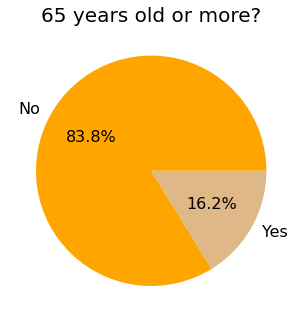

In [115]:
fig = plt.figure(figsize = (5, 4)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

labels = data_treated["senior_citizen"].value_counts().index # Creating the index variable

axis.pie(data_treated["senior_citizen"].value_counts(normalize = True) * 100, labels = labels, colors = ["orange", "burlywood"], autopct = "%.1f%%", textprops={'fontsize': 16}) # Plotting the pie chart
axis.set_title("65 years old or more?", fontsize = 20, pad = 5) # Setting the title of the graph

### <font color = "Green"> 83,8% of customers aren't senior citizens.

## 3c. Partner / Dependents

Text(0, 0.5, '%')

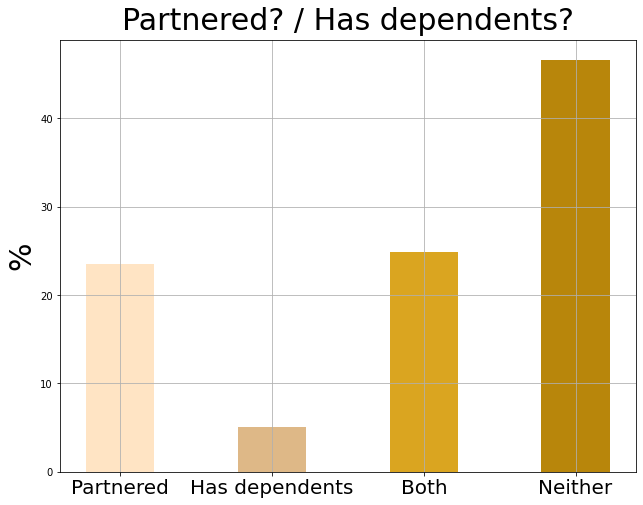

In [116]:
fig = plt.figure(figsize = (8, 6))
axis = fig.add_axes([0, 0, 1, 1])

data = data_treated[["partner", "dependents"]].value_counts(normalize = True) * 100
data.index = pd.Categorical(values = data.index, categories = [("Yes", "No"), ("No", "Yes"), ("Yes", "Yes"), ("No", "No")], ordered = True)
data.sort_index(inplace = True)

xlabels = ["Partnered", "Has dependents", "Both", "Neither"]
xindex = np.arange(len(data))
width = 0.45

axis.grid(True)
axis.bar(x = xindex, height = data, width = width, color = ["bisque", "burlywood", "goldenrod", "darkgoldenrod"])
axis.set_title("Partnered? / Has dependents?", fontsize = 30, pad = 10)

axis.set_xticks(xindex)
axis.set_xticklabels(xlabels, fontsize = 20)
axis.set_ylabel("%", fontsize = 30)

## 3d. Tenure

[Text(0, 0, 'Up to 1'),
 Text(1, 0, '1 to 2'),
 Text(2, 0, '3 to 4'),
 Text(3, 0, '4+')]

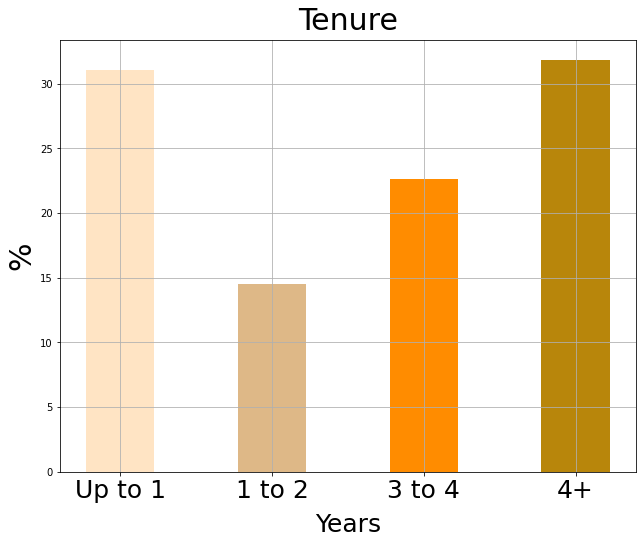

In [142]:
fig = plt.figure(figsize = (8, 6)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

classes = [data_treated["tenure"].min(), 12, 24, 48, data_treated["tenure"].max()]
all_data_by_tenure = pd.cut(x = data_treated["tenure"], bins = classes, labels = ["Up to 1 year", "1 to 2 years", "3 to 4 years", "4+ years"], include_lowest = True).value_counts(normalize = True) * 100 # Creating a data subset with the "tenure" column divided into four categories: "Up to 1 year", "1 to 2 years", "2 to 4 years" and "4+ years"
all_data_by_tenure.index = pd.Categorical(values = all_data_by_tenure.index, categories = ["Up to 1 year", "1 to 2 years", "3 to 4 years", "4+ years"], ordered = True) # Normally, the criteria for sorting indexes is alphabetical order. This would not be optimal for visualization, so I changed the index to a categorical pandas object, which will be sorted according to the parameter "categories" specified.
all_data_by_tenure.sort_index(inplace = True) # After the sorting criteria I wanted were specified, I actually sorted the index and altered the original subset by specifying inplace = True

labels = ["Up to 1", "1 to 2", "3 to 4", "4+"] # Creating the labels
index = np.arange(len(all_data_by_tenure)) # I created the index for the 'x' axis because a bar chart needs to know how many bars it will actually plot in order to organize it in the axis

axis.grid(True) # Enabling the grid pattern
axis.bar(x = index, height = all_data_by_tenure, width = 0.45, align = "center", color = ["bisque", "burlywood", "darkorange", "darkgoldenrod"]) # Plotting the bar chart
axis.set_title("Tenure", fontsize = 30, pad = 10) # Setting the title
axis.set_ylabel("%", fontsize = 30) # Setting the label for the 'y' axis
axis.set_xlabel("Years", fontsize = 25, labelpad = 10)
axis.set_xticks(index) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(labels, fontsize = 25) # Setting the labels for the values along the 'x' axis

## 3e. Flagship services

In [118]:
data_treated[["phone_service", "multiple_lines", "internet_service", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"]].apply(lambda service: service.value_counts(normalize = True) * 100).fillna(value = 0)

,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
DSL,0.000000,0.000000,34.374556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fiber optic,0.000000,0.000000,43.958540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
No,9.683374,48.132898,21.666903,49.666335,43.844952,43.944342,49.311373,39.897771,39.542808
No internet service,0.000000,0.000000,0.000000,21.666903,21.666903,21.666903,21.666903,21.666903,21.666903
No phone service,0.000000,9.683374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Yes,90.316626,42.183729,0.000000,28.666761,34.488144,34.388755,29.021724,38.435326,38.790288


In [119]:
all_data_by_services = data_treated[["phone_service", "multiple_lines", "internet_service", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"]].apply(lambda service: service.apply(lambda answer: "No" if answer == "No internet service" else "No" if answer == "No phone service" else "Yes" if answer == "DSL" else "Yes" if answer == "Fiber optic" else "No" if answer == "No" else "Yes"))

all_data_by_services = all_data_by_services.apply(lambda service: service.value_counts(normalize = True) * 100).fillna(value = 0)

all_data_by_services = all_data_by_services.stack(dropna = False)
all_data_by_services = all_data_by_services.unstack(level = 0)
all_data_by_services

,No,Yes
phone_service,9.683374,90.316626
multiple_lines,57.816271,42.183729
internet_service,21.666903,78.333097
online_security,71.333239,28.666761
online_backup,65.511856,34.488144
device_protection,65.611245,34.388755
tech_support,70.978276,29.021724
streaming_tv,61.564674,38.435326
streaming_movies,61.209712,38.790288


Text(8.35, 26.5, '25%')

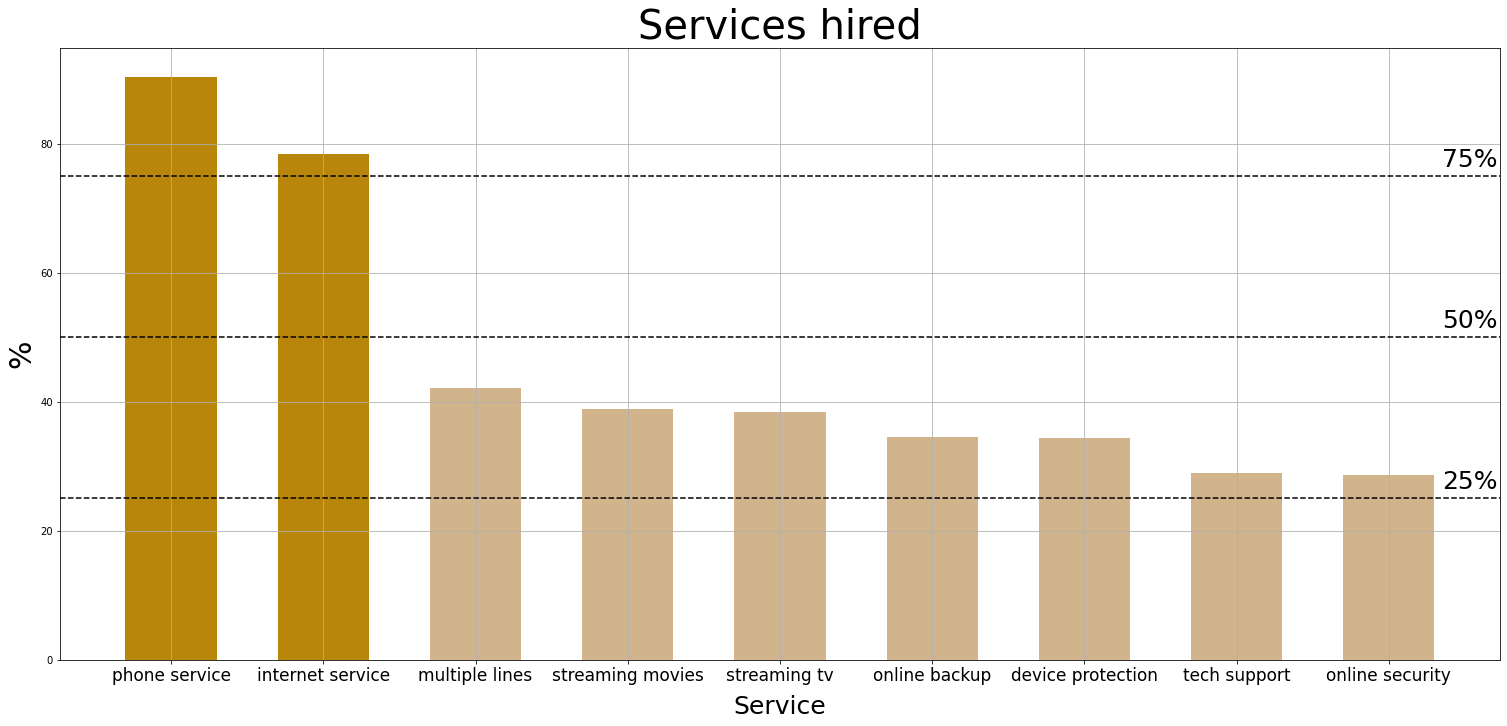

In [161]:
fig = plt.figure(figsize = (20, 8.5))
axis = fig.add_axes([0, 0, 1, 1])

data = all_data_by_services["Yes"].sort_values(ascending = False)
xindex = np.arange(len(data.index))
xlabels = data.index.str.replace("_", " ")

axis.grid(True)
axis.bar(x = xindex, height = data, width = 0.6, color = [("darkgoldenrod" if (data[service] >= 75) else "goldenrod" if (75 > data[service] >= 50) else "tan" if (50 > data[service] >= 25) else "burlywood") for service in xindex])
axis.set_title("Services hired", fontsize = 40, pad = 10)
axis.set_ylabel("%", fontsize = 30)
axis.set_xlabel("Service", fontsize = 25, labelpad = 10)
axis.set_xticks(xindex)
axis.set_xticklabels(xlabels, fontsize = 17)

axis.axhline(75, color = "black", linestyle = "--")
axis.axhline(50, color = "black", linestyle = "--")
axis.axhline(25, color = "black", linestyle = "--")

axis.annotate("75%", xy = (8.35, 76.5), fontsize = 25)
axis.annotate("50%", xy = (8.35, 51.5), fontsize = 25)
axis.annotate("25%", xy = (8.35, 26.5), fontsize = 25)

### <font color = "green"> Phone service and internet service are by far the flagship services of the company, being hired by 90,32% and 78,33% of clients, respectively

---
# 4. Analysing the *churn* variable

Text(0.5, 1.0, 'Customers that have left the company (Churn)')

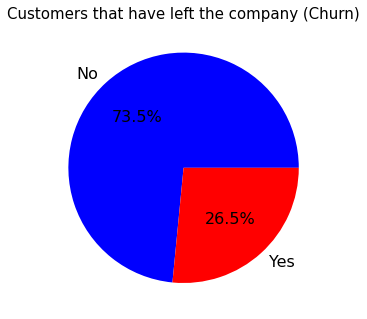

In [121]:
fig = plt.figure(figsize = (5, 4)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

labels = data_treated["churn"].value_counts().index # Creating the labels

axis.pie(data_treated["churn"].value_counts(normalize = True).round(decimals = 4) * 100, labels = labels, colors = ["blue", "red"], autopct = "%.1f%%", textprops={'fontsize': 16}) # Plotting the pie chart
axis.set_title("Customers that have left the company (Churn)", fontsize = 15, pad = 5) # Setting the title

### <font color = "Green"> Approximately 26,54% of the customers have left the company.

## 4a. Churn by gender

Text(0.5, 1.0, 'Churn by gender')

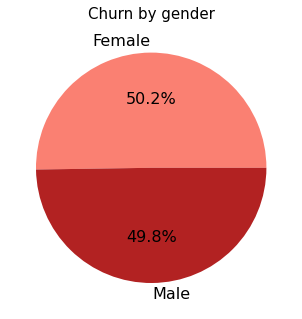

In [122]:
fig = plt.figure(figsize = (5, 4)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

labels = data_treated.query("churn == 'Yes'")["gender"].value_counts().index # Creating the labels

axis.pie(data_treated.query("churn == 'Yes'")["gender"].value_counts(normalize = True).round(decimals = 4) * 100, labels = labels, autopct = "%.1f%%", colors = ["salmon", "firebrick"], textprops={'fontsize': 16}) # Plotting the pie chart
axis.set_title("Churn by gender", fontsize = 15, pad = 5) # Setting the title

### <font color = "Green"> Customers who have left the company are almost equally divided between male and female.


## 4b. Churn by age

Text(0.5, 1.0, 'Churn by age (65 years old or more?)')

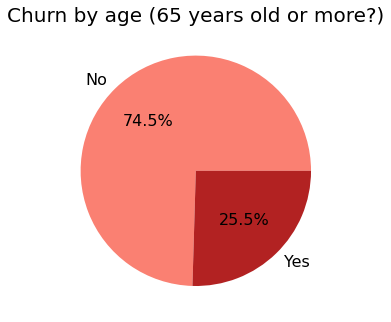

In [141]:
fig = plt.figure(figsize = (5, 4))
axis = fig.add_axes([0, 0, 1, 1])

data = data_treated.query("churn == 'Yes'")["senior_citizen"].value_counts(normalize = True) * 100
labels = data.index

axis.pie(x = data, labels = labels, colors = ["salmon", "firebrick"], textprops={'fontsize': 16}, autopct = "%.1f%%")
axis.set_title("Churn by age (65 years old or more?)", fontsize = 20, pad = 5)

## 4c. Churn by number of services hired

[Text(0, 0, "Didn't Leave"),
 Text(1, 0, 'Left'),
 Text(2, 0, 'Total'),
 Text(3, 0, 'Max')]

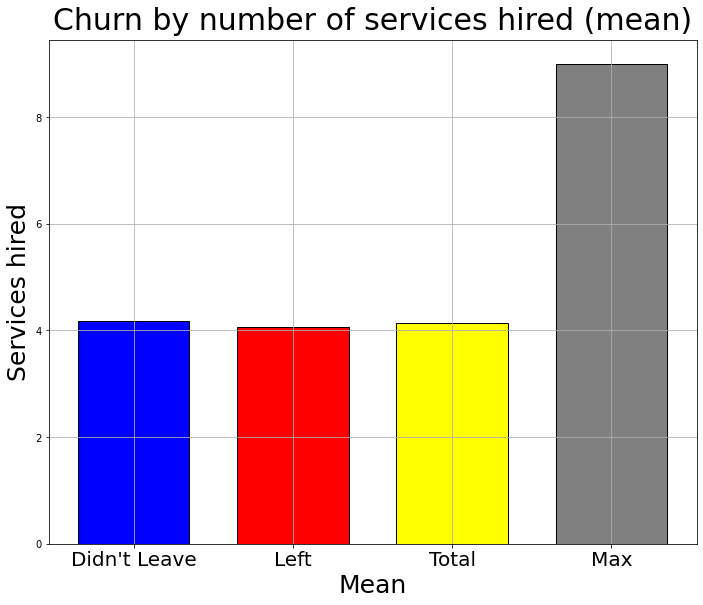

In [159]:
fig = plt.figure(figsize = (9, 7)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

data = [data_treated.query("churn == 'No'")["services_hired"].mean(), data_treated.query("churn == 'Yes'")["services_hired"].mean(), data_treated["services_hired"].mean(), data_treated["services_hired"].max()] # Creating a list of values from different data subsets: the mean value of services hired only for customers that haven't left the company, the mean value of services hired for customers that have left the company and the highest amount of services hired in the entire dataset.
index = range(len(data)) # Creatng the index for the 'x' axis
xlabels = ["Didn't Leave", "Left", "Total", "Max"] # Creating the labels for the 'x' axis

axis.grid(True) # Enabling the grid pattern
axis.bar(index, data, width = 0.7, color = ["blue", "red", "yellow", "gray"], edgecolor = "black") # Plotting the bar chart
axis.set_title("Churn by number of services hired (mean)", fontsize = 30, pad = 10) # Setting the title
axis.set_xlabel("Mean", fontsize = 25) # Setting the label of the 'x' axis
axis.set_ylabel("Services hired", fontsize = 25) # Setting the label of th 'y' axis

axis.set_xticks(index) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(xlabels, fontsize = 20) # Setting the labels for the values along the 'x' axis

### <font color = "Green"> A customer, on average, hires 4 out of 9 different services from the company, regardless of having left the company or not.

[Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'Total'), Text(3, 0, 'Max')]

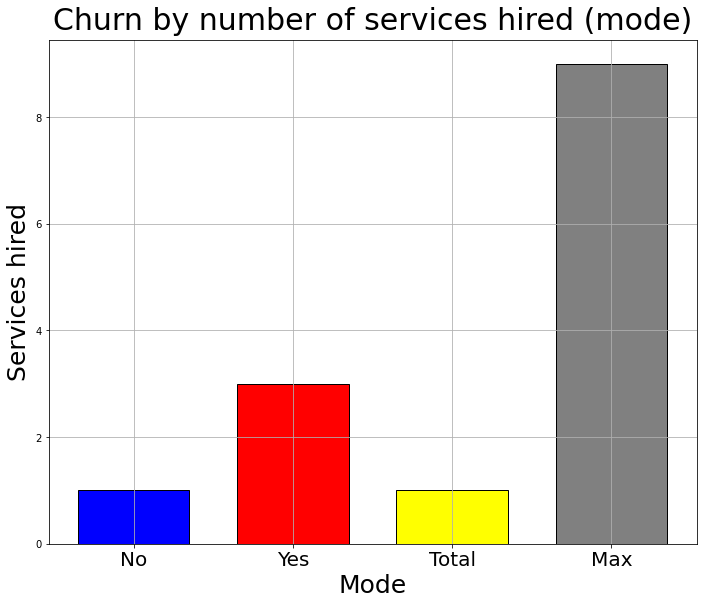

In [157]:
fig = plt.figure(figsize = (9, 7)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

data = [data_treated.query("churn == 'No'")["services_hired"].mode(), data_treated.query("churn == 'Yes'")["services_hired"].mode(), data_treated["services_hired"].mode(), data_treated["services_hired"].max()] # Creating a list of values from different data subsets: the mode value of services hired only for customers that haven't left the company, the mode value of services hired for customers that have left the company and the highest amount of services hired in the entire dataset.
index = range(len(data)) # Creating the index for the 'x' axis
xlabels = ["No", "Yes", "Total", "Max"] # Creating the labels for the 'x' axis

axis.grid(True) # Enabling the grid pattern
axis.bar(index, data, width = 0.7, color = ["blue", "red", "yellow", "gray"], edgecolor = "black") # Plotting the bar chart
axis.set_title("Churn by number of services hired (mode)", fontsize = 30, pad = 10) # Setting the title
axis.set_xlabel("Mode", fontsize = 25) # Setting the label for the 'x' axis
axis.set_ylabel("Services hired", fontsize = 25) # Setting the label for the 'y' axis

axis.set_xticks(index) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(xlabels, fontsize = 20) # Setting the labels for the values along the 'x' axis

### <font color = "green"> The most frequently seen number of services hired among customer who have left the company is 3, whereas the mode for customers who haven't left the company is 1.

## 4d. Churn by charges (in Brazilian Reais)

[Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'Total'), Text(3, 0, 'Max')]

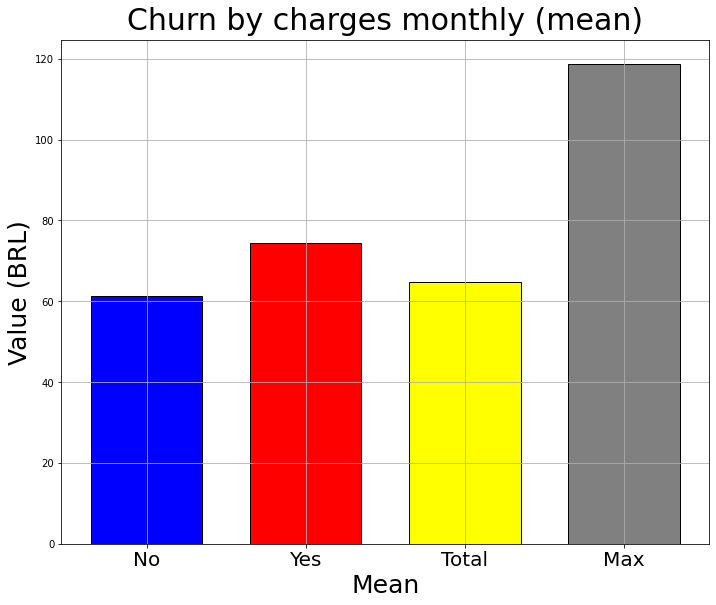

In [158]:
fig = plt.figure(figsize = (9, 7)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

data = [data_treated.query("churn == 'No'")["charges_monthly"].mean(), data_treated.query("churn == 'Yes'")["charges_monthly"].mean(), data_treated["charges_monthly"].mean(), data_treated["charges_monthly"].max()] # Creating a list of values from different data subsets: the mean value of monthly charges only for customers that haven't left the company, the mean value of monthly charges for customers that have left the company and the highest monthly charges value in the entire dataset.
index = range(len(data)) # Creating the index for the 'x' axis
xlabels = ["No", "Yes", "Total", "Max"] # Creating the labels for the 'x' axis

axis.grid(True) # Enabling the grid pattern
axis.bar(index, width = 0.7, height = data, color = ["blue", "red", "yellow", "gray"], edgecolor = "black") # Plotting the bar chart
axis.set_title("Churn by charges monthly (mean)", fontsize = 30, pad = 10) # Setting the title
axis.set_xlabel("Mean", fontsize = 25) # Setting the label of the 'x' axis
axis.set_ylabel("Value (BRL)", fontsize = 25) # Setting the label of the 'y' axis

axis.set_xticks(index) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(xlabels, fontsize = 20) # Setting the labels for the values along the 'x' axis

### <font color = "Green"> A customer that has left the company has spent, on average, around 74,44 BRL monthly with the company's services, whereas customers ho haven't left spend around 61.27 BRL monthly.

## 4e. Churn by partner / dependents


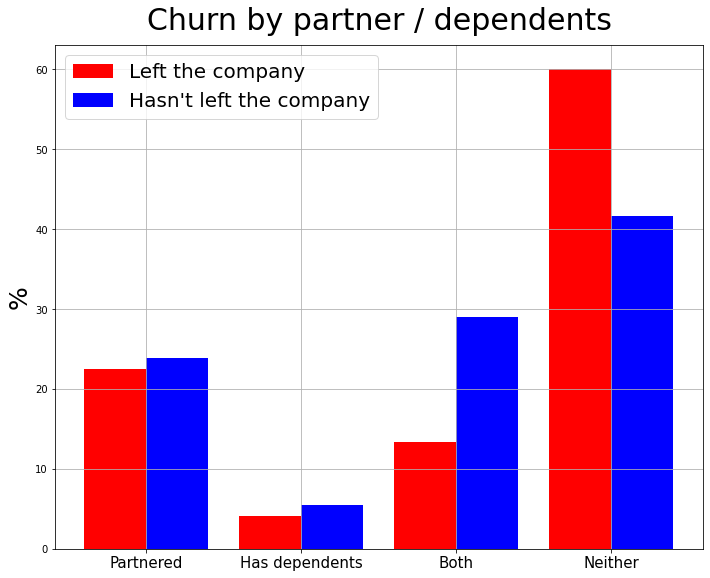

In [162]:
fig = plt.figure(figsize = (9, 7)) # Creating an empty Matplotlib figure
axis = fig.add_axes([0, 0, 1, 1]) # Adding an empty axis onto which the graph will be plotted

data = data_treated.query("churn == 'Yes'")[["partner", "dependents"]].value_counts(normalize = True) * 100 # Creating the first data subset, with the value counts of the 'partner' and 'dependent' columns for customers that have left the company
data.index = pd.Categorical(values = data.index, categories = [("Yes", "No"), ("No", "Yes"), ("Yes", "Yes"), ("No", "No")], ordered = True) # Replacing the index with a Categorical pandas Object for custom sorting.
# ("Yes", "No") = Partnered, but no dependents
# ("No", "Yes") = Not partnered, but has dependents.
# ("Yes", "Yes") = Both partnered and has dependents.
# ("No", "No") = Neither partnered nor has dependents.
data.sort_index(inplace = True)

data2 = data_treated.query("churn == 'No'")[["partner", "dependents"]].value_counts(normalize = True) * 100 # Creating the second data subset, with the value counts of the 'partner' and 'dependent' columns for customers that haven't left the company
data2.index = pd.Categorical(values = data2.index, categories = [("Yes", "No"), ("No", "Yes"), ("Yes", "Yes"), ("No", "No")], ordered = True)
data2.sort_index(inplace = True)

xlabels = ["Partnered", "Has dependents", "Both", "Neither"] # Creating the labels for the 'x' axis
x_position = np.arange(len(data_treated.query("churn == 'Yes'")[["partner", "dependents"]].value_counts())) # Creating the index for the 'x' axis for data subset 1
x_position2 = np.arange(len(data_treated.query("churn == 'No'")[["partner", "dependents"]].value_counts())) # Creating the index for the 'x' axis for data subset 2
width = 0.4 # Establishing the width of the bars

axis.grid(True) # Enabling the grid pattern
axis.bar(x = x_position - width/2, height = data, data = data, width = 0.4, label = "Left the company", color = "red") # Plotting the first batch of bars onto the axis (the formula passed to the 'x' indicates that this set of bars will stand on the left)
axis.bar(x = x_position2 + width/2, height = data2, data = data2, width = 0.4, label = "Hasn't left the company", color = "blue") # Plotting the second batch of bars onto the axis (the formula passed to the 'x' indicates that this set of bars will stand on the right)
axis.set_title("Churn by partner / dependents", fontsize = 30, pad = 15) # Setting the title
axis.set_ylabel("%", fontsize = 25) # Setting the label of the 'y' axis
axis.set_xticks(x_position) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(xlabels, fontsize = 15) # Setting the labels for the values along the 'x' axis
axis.legend(fontsize = 20) # Creating a legend

### <font color = "Green"> People who are neither partnered nor have dependents are more likely to leave the company than people who are partnered AND have dependents.

## 4f. Churn by tenure

In [148]:
minimum_tenure_churn_yes = data_treated.query("churn == 'Yes'")["tenure"].min()
maximun_tenure_churn_yes = data_treated.query("churn == 'Yes'")["tenure"].max()

classes = [minimum_tenure_churn_yes, 12, 24, 36, maximun_tenure_churn_yes]
labels = ["Up to 1", "1 to 2", "3 to 4", "4+"]

data1 = pd.cut(x = data_treated.query("churn == 'Yes'")["tenure"], bins = classes, labels = labels, include_lowest = True).value_counts(normalize = True) * 100
data1.index = pd.Categorical(values = data1.index, categories = labels, ordered = True)
data1.sort_index(inplace = True)
xindex1 = np.arange(len(data1.index))

data2 = pd.cut(x = data_treated.query("churn == 'No'")["tenure"], bins = classes, labels = labels, include_lowest = True).value_counts(normalize = True) * 100
data2.index = pd.Categorical(values = data2.index, categories = labels, ordered = True)
data2.sort_index(inplace = True)
xindex2 = np.arange(len(data2.index))

[Text(0, 0, 'Up to 1'),
 Text(1, 0, '1 to 2'),
 Text(2, 0, '3 to 4'),
 Text(3, 0, '4+')]

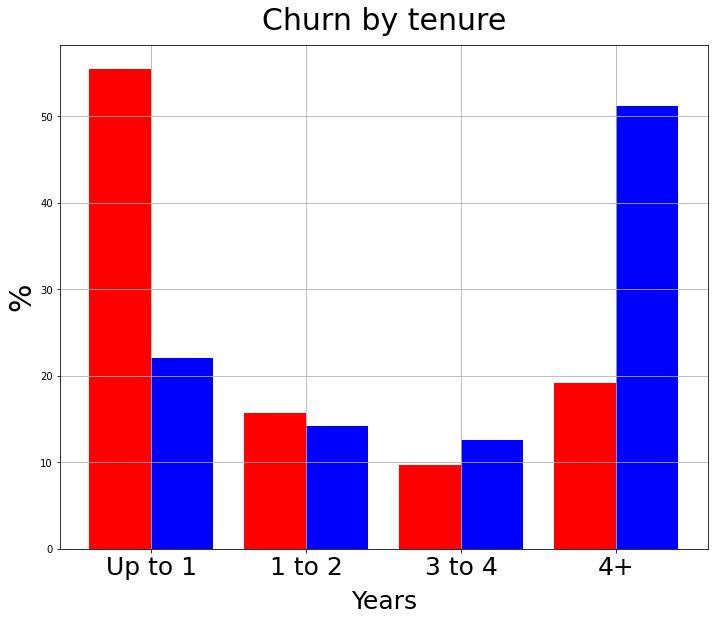

In [149]:
fig = plt.figure(figsize = (9, 7))
axis = fig.add_axes([0, 0, 1, 1])

width = 0.4

axis.grid(True)
axis.bar(x = xindex1 - width/2, height = data1, width = width, label = "Left the company", color = "red")
axis.bar(x = xindex2 + width/2, height = data2, width = width, label = "Hasn't left the company", color = "blue")

axis.set_title("Churn by tenure", fontsize = 30, pad = 15)
axis.set_ylabel("%", fontsize = 30) # Setting the label for the 'y' axis
axis.set_xlabel("Years", fontsize = 25, labelpad = 10)
axis.set_xticks(xindex1) # Setting the amount of values along the 'x' axis
axis.set_xticklabels(labels, fontsize = 25) # Setting the labels for the values along the 'x' axis

### <font color = "green"> More than 50% of customers who have left the company have done so before completing 1 year of tenure.

## 4g. Churn by services used

In [127]:
churn_by_service_yes = data_treated.query("churn == 'Yes'")[["phone_service", "multiple_lines", "internet_service", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"]].apply(lambda service: service.apply(lambda answer: "No" if answer == "No internet service" else "No" if answer == "No phone service" else "Yes" if answer == "DSL" else "Yes" if answer == "Fiber optic" else "No" if answer == "No" else "Yes"))
churn_by_service_yes = churn_by_service_yes.apply(lambda service: service.value_counts(normalize = True) * 100).fillna(value = 0)

churn_by_service_yes = churn_by_service_yes.stack(dropna = False)
churn_by_service_yes = churn_by_service_yes.unstack(level = 0)
churn_by_service_yes

,No,Yes
phone_service,9.095773,90.904227
multiple_lines,54.521134,45.478866
internet_service,6.046014,93.953986
online_security,84.216158,15.783842
online_backup,72.017121,27.982879
device_protection,70.840021,29.159979
tech_support,83.413590,16.586410
streaming_tv,56.447298,43.552702
streaming_movies,56.233280,43.766720


In [128]:
churn_by_service_no = data_treated.query("churn == 'No'")[["phone_service", "multiple_lines", "internet_service", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies"]].apply(lambda service: service.apply(lambda answer: "No" if answer == "No internet service" else "No" if answer == "No phone service" else "Yes" if answer == "DSL" else "Yes" if answer == "Fiber optic" else "No" if answer == "No" else "Yes"))
churn_by_service_no = churn_by_service_no.apply(lambda service: service.value_counts(normalize = True) * 100).fillna(value = 0)

churn_by_service_no = churn_by_service_no.stack(dropna = False)
churn_by_service_no = churn_by_service_no.unstack(level = 0)
churn_by_service_no

,No,Yes
phone_service,9.895632,90.104368
multiple_lines,59.006571,40.993429
internet_service,27.309625,72.690375
online_security,66.679552,33.320448
online_backup,63.161964,36.838036
device_protection,63.722458,36.277542
tech_support,66.486278,33.513722
streaming_tv,63.413220,36.586780
streaming_movies,63.007344,36.992656


In [129]:
churn_by_service = pd.merge(
    left = churn_by_service_yes,
    right = churn_by_service_no,
    left_index = True,
    right_index = True
)

churn_by_service

,No_x,Yes_x,No_y,Yes_y
phone_service,9.095773,90.904227,9.895632,90.104368
multiple_lines,54.521134,45.478866,59.006571,40.993429
internet_service,6.046014,93.953986,27.309625,72.690375
online_security,84.216158,15.783842,66.679552,33.320448
online_backup,72.017121,27.982879,63.161964,36.838036
device_protection,70.840021,29.159979,63.722458,36.277542
tech_support,83.413590,16.586410,66.486278,33.513722
streaming_tv,56.447298,43.552702,63.413220,36.586780
streaming_movies,56.233280,43.766720,63.007344,36.992656


In [130]:
churn_by_service = churn_by_service.sort_values(by = "Yes_x", ascending = False)
churn_by_service

,No_x,Yes_x,No_y,Yes_y
internet_service,6.046014,93.953986,27.309625,72.690375
phone_service,9.095773,90.904227,9.895632,90.104368
multiple_lines,54.521134,45.478866,59.006571,40.993429
streaming_movies,56.233280,43.766720,63.007344,36.992656
streaming_tv,56.447298,43.552702,63.413220,36.586780
device_protection,70.840021,29.159979,63.722458,36.277542
online_backup,72.017121,27.982879,63.161964,36.838036
tech_support,83.413590,16.586410,66.486278,33.513722
online_security,84.216158,15.783842,66.679552,33.320448


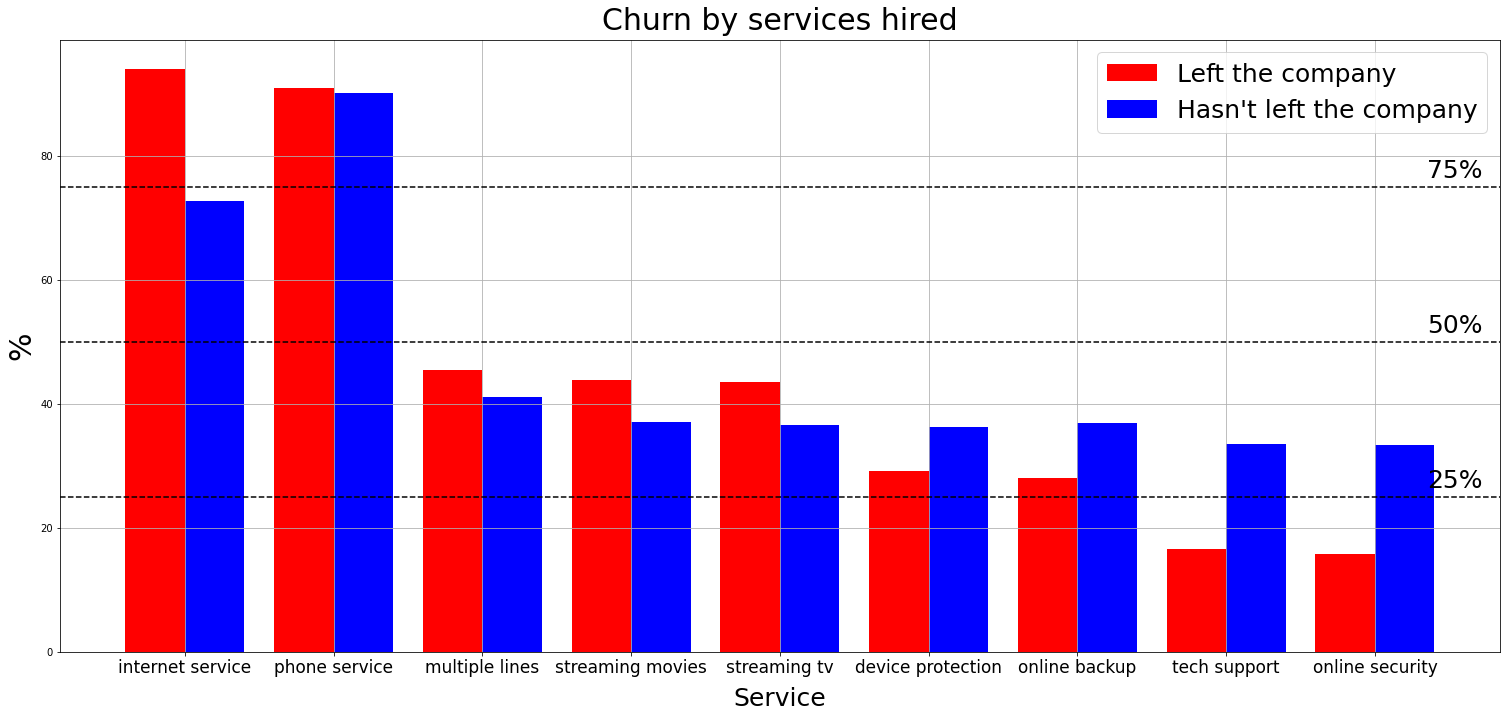

In [137]:
fig = plt.figure(figsize = (20, 8.5))
axis = fig.add_axes([0, 0, 1, 1])

data_churn_yes = churn_by_service["Yes_x"]
data_churn_no = churn_by_service["Yes_y"]
xindex1 = np.arange(len(data_churn_yes.index))
xindex2 = np.arange(len(data_churn_no.index))
xlabels = churn_by_service.index.str.replace("_", " ")
width = 0.4

axis.grid(True)
axis.bar(x = xindex1 - width/2, height = data_churn_yes, width = width, color = "red", label = "Left the company")
axis.bar(x = xindex2 + width/2, height = data_churn_no, width = width, color = "blue", label = "Hasn't left the company")
axis.set_title("Churn by services hired", fontsize = 30,pad = 10)
axis.set_ylabel("%", fontsize = 30)
axis.set_xlabel("Service", fontsize = 25, labelpad = 10)
axis.set_xticks(xindex)
axis.set_xticklabels(xlabels, fontsize = 17)

axis.axhline(75, color = "black", linestyle = "--")
axis.axhline(50, color = "black", linestyle = "--")
axis.axhline(25, color = "black", linestyle = "--")

axis.annotate("75%", xy = (8.35, 76.5), fontsize = 25)
axis.annotate("50%", xy = (8.35, 51.5), fontsize = 25)
axis.annotate("25%", xy = (8.35, 26.5), fontsize = 25)

axis.legend(fontsize = 25)

## <font color = "Blue"> 3. Grouping the DataFrame by the *churn* variable.

##### Using the groupby() method, we can divide all entries of the DataFrame by the *churn* variable to draw further insight from integer or float data.

In [ ]:
# Work in progress
data_by_churn = data_treated.groupby(by = "churn")

In [ ]:
# Work in progress

data_by_churn[["charges_monthly", "charges_total"]].agg(func = ["min", "mean", "max"])

### <font color = "Green"> The customers who have left the company have spent, on average, around *74,44* Brazilian Reais with the company's services, which is around *13,00* Brazilian Reais more than the average customer who hasn't left the company.

In [ ]:
# Work in progress

data_by_churn["services_hired"].agg(func = ["min", "mean", "max"])

### <font color = "Green"> No obvious difference can be seen between the consumption habits of customers that have left and the ones that stayed with the company.

---
# Visualizing the distribution of the *churn* variable

---
# Applying other relevant visualization methods for the *churn* variable

---
# Analysing the correlation between the variables